In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# read from google drive, run on colab
X_train = pd.read_csv('./housing_X_train.csv')
y_train = pd.read_csv('./housing_y_train.csv')
X_test = pd.read_csv('./housing_X_test.csv')
y_test = pd.read_csv('./housing_y_test.csv')

# read from loacl

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)

X_train = X_train.values.T
X_test = X_test.values.T
y_train = y_train.values
y_test = y_test.values

## Ex1 2.

In [2]:
def compute_gradient(X,w,b,y,l):
    n = X.shape[0]
    tmp = X.dot(w) + b*np.ones((n,1)) - y
    j_w = (1./n)*np.dot(X.T, tmp) + 2.*l*w
    j_b = (1./n)*np.dot(np.ones((n,1)).T, tmp)
    return [j_w,j_b]

In [3]:
def ridge_regression(X,y,X_test,y_test,w,b,max_pass,eta,tol,lamda):
    loss = []
    train_error = []
    test_error = []
    n = X.shape[0]
    for i in range(max_pass):
        J = compute_gradient(X,w,b,y,lamda)
        w_new = w - eta*J[0]
        b_new = b - eta*J[1]
        cost = (1./(2.*n))*np.dot((X.dot(w_new)+b_new*np.ones((n,1))-y).T, (X.dot(w_new)+b_new*np.ones((n,1))-y)) + lamda * w_new.T.dot(w_new)
        loss.append(cost[0])
        train_error.append(cost[0] - (lamda * w_new.T.dot(w_new))[0])
        y_pred = np.dot(X_test, w_new) + b_new * np.ones((X_test.shape[0],1))
        test_error.append((1./(2*y_test.shape[0])) * np.dot((y_pred-y_test).T, (y_pred-y_test))[0])
        if np.linalg.norm(w_new-w) <= tol:
            w = w_new
            b = b_new
            break
        w = w_new
        b = b_new
    return [loss, train_error, test_error, w, b]

### If lambda = 0

In [4]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,0)

loss curve

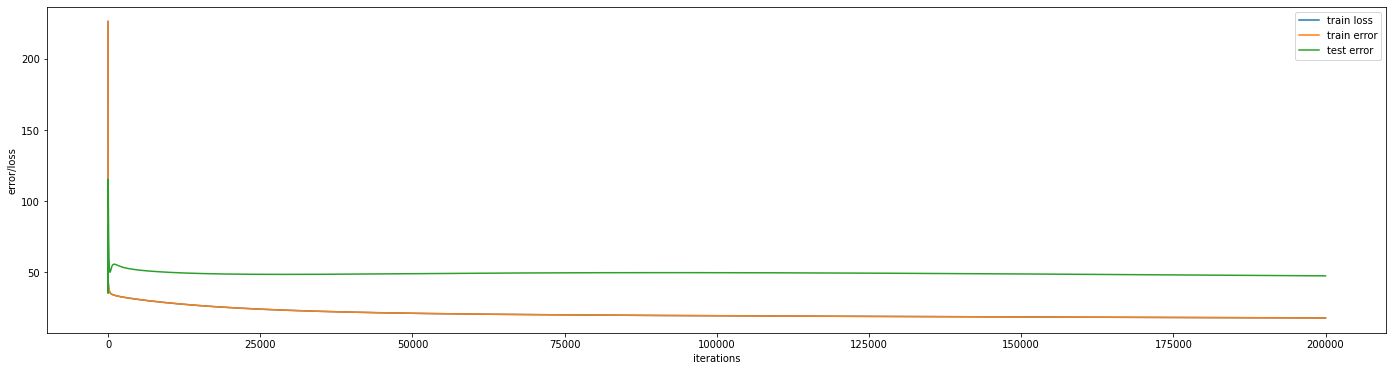

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [6]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 17.783540, train error: 17.783540, test error: 47.408943


In [7]:
y_pred = np.dot(X_test, w) + b*np.ones((X_test.shape[0],1))

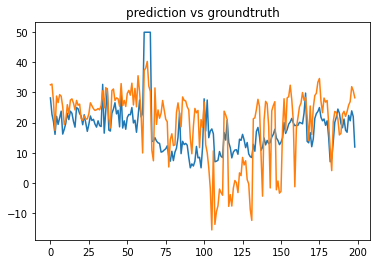

In [8]:
plt.figure()
plt.title('prediction vs groundtruth')
plt.plot(y_test)
plt.plot(y_pred)

### If lambda = 10

In [9]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,10)

loss curve

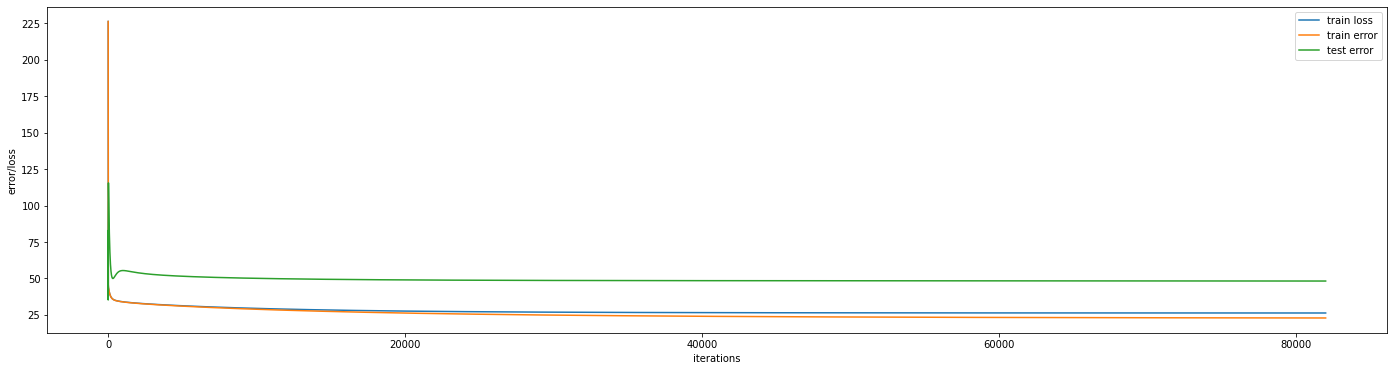

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [11]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 26.256545, train error: 22.836206, test error: 48.189843


In [12]:
y_pred = np.dot(X_test, w) + b*np.ones((X_test.shape[0],1))

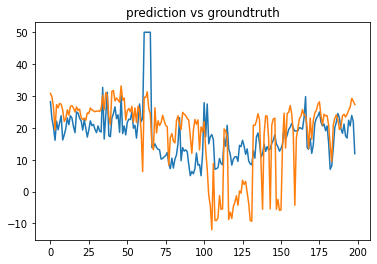

In [13]:
plt.figure()
plt.title('prediction vs groundtruth')
plt.plot(y_test)
plt.plot(y_pred)

## EX1 3.

### If lambda = 0

In [14]:
def ridge_regression_new(X,y,X_test,y_test,w,b,max_pass,eta,tol,lamda):
    loss = []
    train_error = []
    test_error = []
    n = X.shape[0]
    for i in range(max_pass):
        J = compute_gradient(X,w,b,y,lamda)
        w_new = w - eta*J[0]
        b_new = np.mean(y-X.dot(w_new))
        cost = (1./(2.*n))*np.dot((X.dot(w_new)+b_new*np.ones((n,1))-y).T, (X.dot(w_new)+b_new*np.ones((n,1))-y)) + lamda * w_new.T.dot(w_new)
        loss.append(cost[0])
        train_error.append(cost[0] - (lamda * w_new.T.dot(w_new))[0])
        y_pred = np.dot(X_test, w_new) + b_new * np.ones((X_test.shape[0],1))
        test_error.append((1./(2*y_test.shape[0])) * np.dot((y_pred-y_test).T, (y_pred-y_test))[0])
        if np.linalg.norm(w_new-w) <= tol:
            w = w_new
            b = b_new
            break
        w = w_new
        b = b_new
    return [loss, train_error, test_error, w, b]

In [15]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression_new(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,0)

loss curve

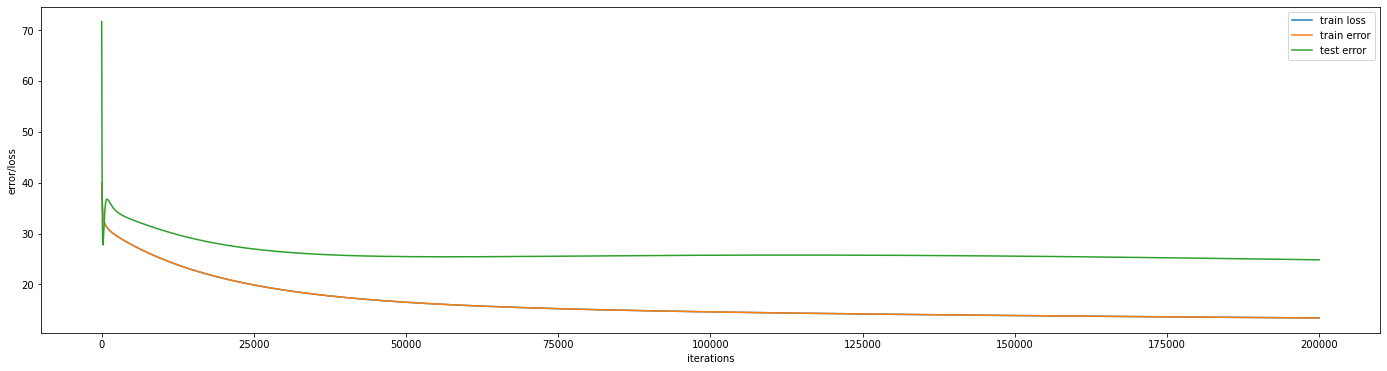

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [17]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 13.400300, train error: 13.400300, test error: 24.824898


In [18]:
y_pred = np.dot(X_test, w) + b*np.ones((X_test.shape[0],1))

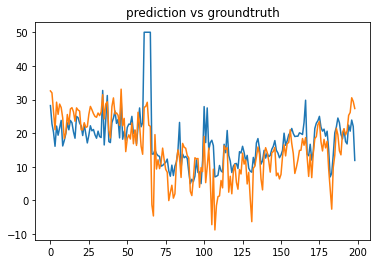

In [19]:
plt.figure()
plt.title('prediction vs groundtruth')
plt.plot(y_test)
plt.plot(y_pred)

### If lambda = 10

In [20]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression_new(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,10)

loss curve

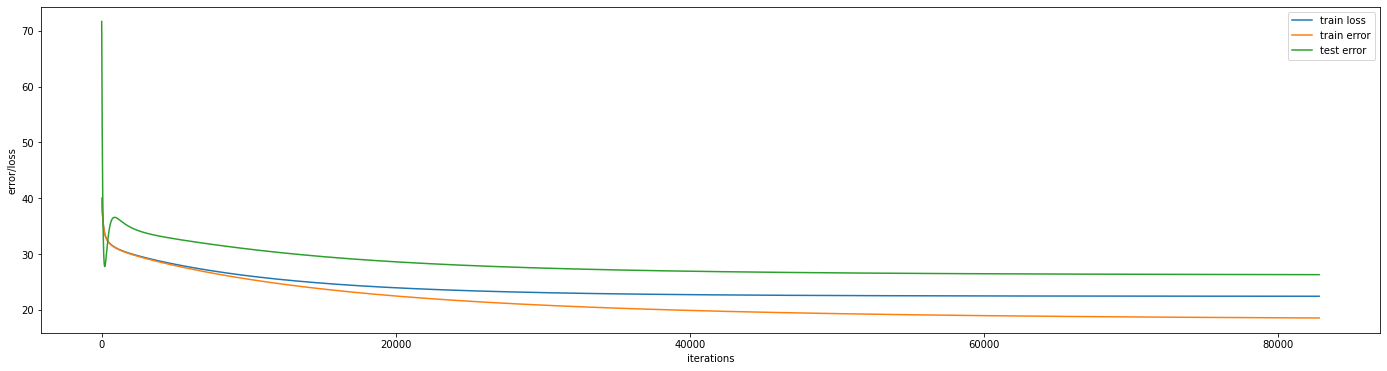

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [22]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 22.429403, train error: 18.535862, test error: 26.299713


In [23]:
y_pred = np.dot(X_test, w) + b*np.ones((X_test.shape[0],1))

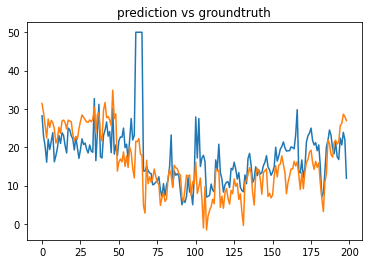

In [24]:
plt.figure()
plt.title('prediction vs groundtruth')
plt.plot(y_test)
plt.plot(y_pred)

## EX1 4.

In [25]:
X_train_center = X_train.copy()
y_train_center = y_train.copy()

X_mean = np.mean(X_train_center, axis=0)

X_train_center -= X_mean

y_mean = np.mean(y_train_center, axis=0)
y_train_center -= y_mean

### If lambda = 0

In [26]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,0)

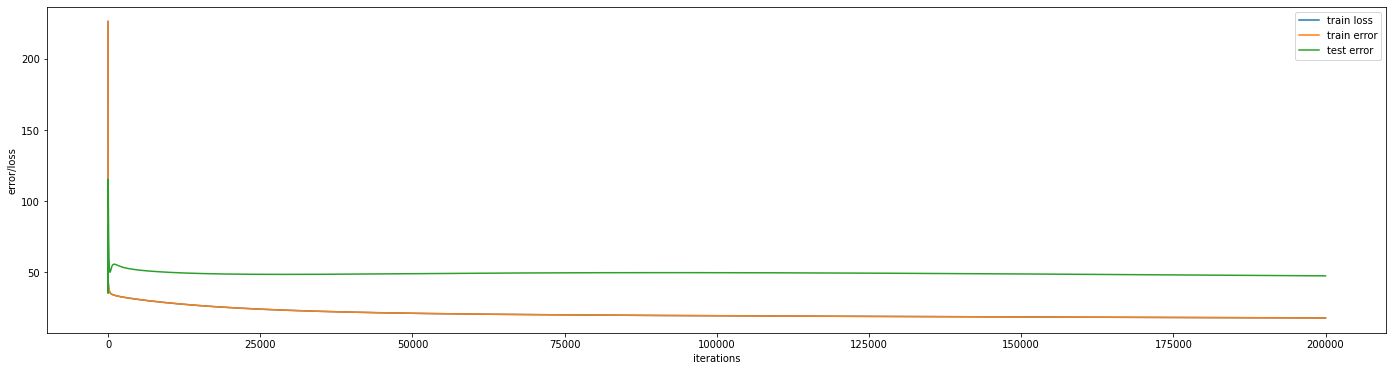

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [28]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 17.783540, train error: 17.783540, test error: 47.408943


In [29]:
print(b)

[[0.04580368]]


### If lambda = 10

In [30]:
w = np.zeros((X_train.shape[1],1))
b = 0

[loss, train_error, test_error, w, b] = ridge_regression(X_train,y_train,X_test,y_test,w,b,200000,0.000001,0.000001,10)

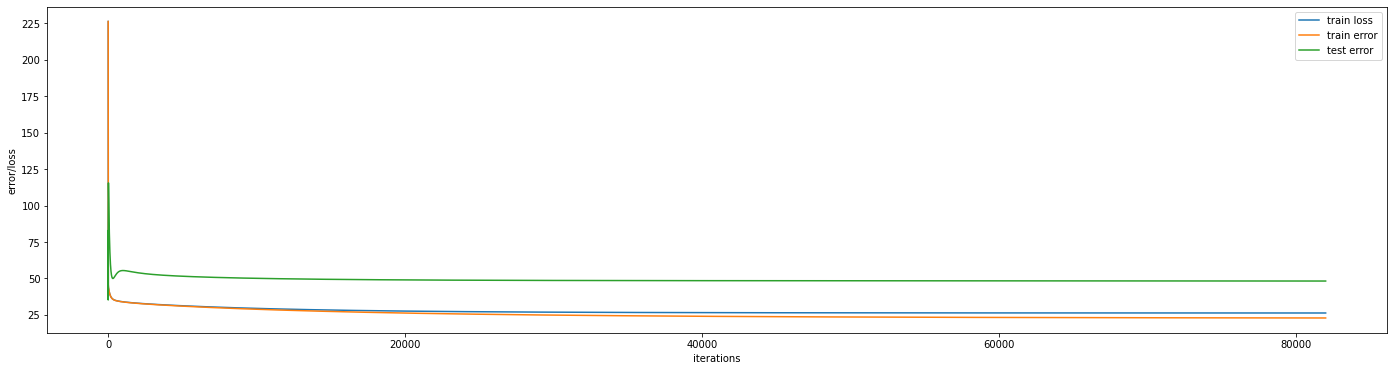

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.plot(loss)
plt.plot(train_error)
plt.plot(test_error)
plt.xlabel('iterations')
plt.ylabel('error/loss')
plt.legend(['train loss', 'train error', 'test error'])

In [32]:
print('end with train loss: %f, train error: %f, test error: %f' % (loss[-1], train_error[-1],test_error[-1]))

end with train loss: 26.256545, train error: 22.836206, test error: 48.189843


In [33]:
print(b)

[[0.01814166]]
